In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('../data/results/transcription.pickle')

In [4]:
transcripts = df.transcript.unique()

In [6]:
df.columns

Index(['transcript', 'recording', 'index', 'speaker', 'pred_sent', 'speech',
       'positive', 'negative', 'mixed', 'neutral'],
      dtype='object')

In [8]:
%matplotlib inline

In [37]:
def plot_sentiment(df):
    spk_name_map = {
        'ch_0': 'Attendant',
        'spk_0': 'Attendant',
        'ch_1': "Customer",
        'spk_1': 'Customer'
    }
    speakers = df.speaker.unique()
    recording = df.recording.unique()[0]
    print(len(speakers))
    fig, ax = plt.subplots(nrows=len(speakers), ncols=1, figsize=(20, 10))
    for i, speaker in enumerate(speakers):
        df[df.speaker == speaker][
            ['index', 'positive', 'negative']
        ].plot.line(x='index', ax = ax[i], color=['green', 'red'])
        ax[i].set_title(spk_name_map[speaker])
        ax[i].legend(loc='upper left')
    fig.suptitle(recording)
    return fig;

In [61]:
greens = sns.light_palette('green', as_cmap=True)
reds = sns.light_palette('red', as_cmap=True)
speaker_map = {'ch_0': 'aliceblue', 'spk_0': 'aliceblue', 'ch_1': 'cornsilk', 'spk_1': 'conrsilk'}
sentiment_map = {'POSITIVE': 'limegreen', 'NEGATIVE': 'red', 'MIXED': 'yellow', 'NEUTRAL': 'lightgrey'}

def color_col(map):
    def color_format(col):
        return [f'background-color:{map[v]}' if v in map else '' for v in col]
    return color_format

In [66]:
df[df.transcript == transcripts[2]].drop(['transcript'], axis=1).set_index('index').style.apply(
    color_col(sentiment_map), subset='pred_sent'
).apply(
    color_col(speaker_map), subset='speaker'
).background_gradient(cmap=greens, subset='positive').background_gradient(cmap=reds, subset='negative')

,recording,speaker,pred_sent,speech,positive,negative,mixed,neutral
index,,,,,,,,
0,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_0,POSITIVE,"schönen Tag willkommen beim Gruner-und-Jahr Kunst, das ist mein Name ist",0.999569,0.000023,0.000001,0.000407
1,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_1,NEUTRAL,"Hallo Frau muss der Frau, mein Name ist Hans Mustermann. Ich wollte gerne einen ankündigen",0.012955,0.008940,0.000010,0.978094
2,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_0,NEGATIVE,"wie schade, das tut mir sehr leid das zu hören.",0.000045,0.999780,0.000000,0.000175
3,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_0,NEUTRAL,Dann geben sie mir doch gern Ihre Auftragsnummer,0.414049,0.043548,0.000058,0.542345
4,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_0,NEGATIVE,"Ja, ich habe einfach nicht mehr.",0.006031,0.871528,0.000007,0.122434
5,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_1,NEGATIVE,Die Auftragsnummer lautet einstweilen 34,0.000354,0.899510,0.000002,0.100135
6,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_1,NEUTRAL,243,0.000982,0.000142,0.000007,0.998868
7,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_0,NEUTRAL,ja für den personen ab gleich bitte noch mal die ihre straße mit Postplatz zwei und wort.,0.151221,0.117645,0.000030,0.731105
8,017404e1-995b-418c-beb4-9ead3f79a7b6.wav,ch_1,NEUTRAL,Aktuell ist das Schlehenweg 22,0.001463,0.013366,0.000002,0.985169


2


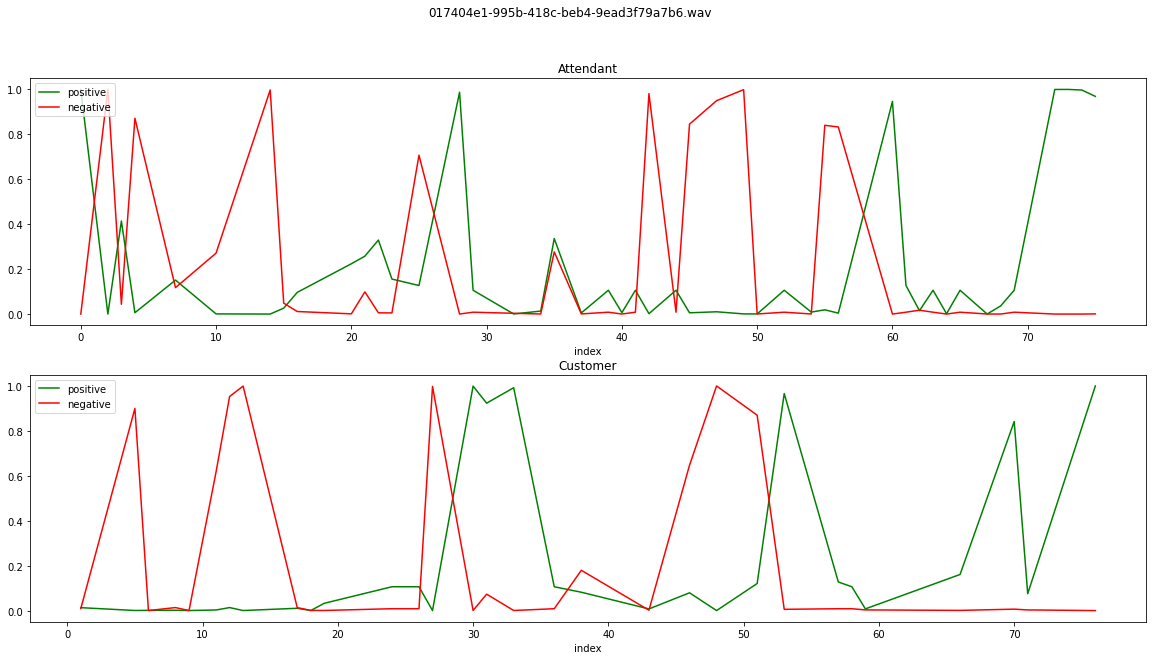

In [40]:
plot_sentiment(df[df.transcript == transcripts[2]]);